In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
import os
for dirname, _, filenames in os.walk('C:/Users/HP/Downloads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

C:/Users/HP/Downloads\20SE02ML016_lab manual.pdf
C:/Users/HP/Downloads\20se02ml021-07.pdf
C:/Users/HP/Downloads\897C338F-2621-4A74-AB7A-E41305FAB1D7.pdf
C:/Users/HP/Downloads\911.csv
C:/Users/HP/Downloads\911.csv.zip
C:/Users/HP/Downloads\Anaconda3-2021.11-Windows-x86_64.exe
C:/Users/HP/Downloads\archive.zip
C:/Users/HP/Downloads\ChromeSetup.exe
C:/Users/HP/Downloads\counting rules.pdf
C:/Users/HP/Downloads\data science 4.pdf
C:/Users/HP/Downloads\Data-Science.pdf
C:/Users/HP/Downloads\desktop.ini
C:/Users/HP/Downloads\DOM.pptx
C:/Users/HP/Downloads\german 2nd.pdf
C:/Users/HP/Downloads\ipdc 7 & 8.pdf
C:/Users/HP/Downloads\L-16 Insignificance of failures.pdf
C:/Users/HP/Downloads\L-22. GLORIOUS PAST - 1.pdf
C:/Users/HP/Downloads\LAB MANUAL.rtf
C:/Users/HP/Downloads\movie project.ipynb
C:/Users/HP/Downloads\movie project.rst
C:/Users/HP/Downloads\movies.csv
C:/Users/HP/Downloads\movies_metadata.csv
C:/Users/HP/Downloads\multiple_linear_regression.ipynb.file (1).txt
C:/Users/HP/Downloads\

In [3]:
df=pd.read_csv('C:/Users/HP/Downloads/movies.csv')
df.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


In [4]:
df.shape

(1284, 10)

In [5]:
df.columns

Index(['imdbId', 'title', 'releaseYear', 'releaseDate', 'genre', 'writers',
       'actors', 'directors', 'sequel', 'hitFlop'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbId       1284 non-null   object 
 1   title        1284 non-null   object 
 2   releaseYear  1284 non-null   int64  
 3   releaseDate  1231 non-null   object 
 4   genre        1282 non-null   object 
 5   writers      1165 non-null   object 
 6   actors       1281 non-null   object 
 7   directors    1280 non-null   object 
 8   sequel       1281 non-null   float64
 9   hitFlop      1284 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 100.4+ KB


In [7]:
df.isna().sum()

imdbId           0
title            0
releaseYear      0
releaseDate     53
genre            2
writers        119
actors           3
directors        4
sequel           3
hitFlop          0
dtype: int64

In [8]:
df['releaseDate'].fillna(df['releaseDate'].mode()[0],inplace = True)
df['writers'].fillna('Unknown',inplace = True)
df.dropna(inplace = True)

In [9]:
print(df.isna().sum())

imdbId         0
title          0
releaseYear    0
releaseDate    0
genre          0
writers        0
actors         0
directors      0
sequel         0
hitFlop        0
dtype: int64


In [10]:

release_years = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 1999, 2000]
def min_max_normalize(lst):
    minimum = min(lst)
    maximum = max(lst)
    normalized = list()
    for i in lst:
        normalized.append((i-minimum)/(maximum-minimum))
    return normalized
print(min_max_normalize(release_years))

[0.16666666666666666, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334, 0.9166666666666666, 1.0, 0.0, 0.08333333333333333]


In [11]:
def distance(movie1, movie2):
    squared_difference = 0
    for i in range(len(movie1)):
        squared_difference += (movie1[i] - movie2[i]) ** 2
    final_distance = squared_difference ** 0.5
    return final_distance

In [12]:
distance([df.iloc[0]["sequel"],df.iloc[0]["hitFlop"]],[df.iloc[1]["sequel"],df.iloc[1]["hitFlop"]])

4.0

In [13]:
def classify(unknown,dataset, k):
    distances = list()
    for row_number, row in dataset.iterrows():
        movie = [row["sequel"],row["hitFlop"]]
        distance_to_point = distance(movie, unknown)
        distances.append([distance_to_point,row["title"]])
    distances.sort()
    neighbors = distances[:k]
    return neighbors
print(classify([1285, 50, 6],df,5))

[[1283.8243649347055, 'Hate Story 2'], [1284.6544282413072, 'Dhoom: 3'], [1284.686732242534, 'Aashiqui 2'], [1284.686732242534, 'Dabangg 2'], [1284.686732242534, 'Dhoom:2']]


In [14]:
def label_encoder(row):
    if row["hitFlop"] > 3:
        return 1
    else:
        return 0
df["label"] = df.apply(lambda row: label_encoder(row), axis=1)
df.head(5)

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,label
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2,0
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6,1
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,Unknown,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1,0
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4,1
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1,0


In [15]:
def classify(unknown,dataset,labels, k):
    distances = list()
    for row_number, row in dataset.iterrows():
        movie = [row["sequel"],row["hitFlop"]]
        distance_to_point = distance(movie, unknown)
        distances.append([distance_to_point,row["title"],row["label"]])
    distances.sort()
    neighbors = distances[0:k]
    num_good = 0
    num_bad = 0
    for neighbor in neighbors:
        label = neighbor[2]
        if label == 0:
            num_bad += 1
        elif label == 1:
            num_good += 1
    if num_good > num_bad:
        return 1
    else:
        return 0
print(classify([1285, 50, 6],df,df["label"],5))

1


In [16]:
X=df.iloc[:,1:7]
X=pd.get_dummies(X)
X=X.values
X

array([[2001,    0,    0, ...,    0,    0,    0],
       [2001,    0,    0, ...,    0,    0,    0],
       [2004,    0,    0, ...,    0,    0,    0],
       ...,
       [2014,    0,    0, ...,    0,    0,    0],
       [2014,    0,    0, ...,    0,    0,    0],
       [2014,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [17]:
Y=df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
print('Cross val', cross_val_score(knn,Y_test.reshape(-1,1),y_pred, cv=10))
print('Accuracy', np.mean(cross_val_score(knn,Y_test.reshape(-1,1),y_pred)))

Cross val [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.96875    0.96774194 0.96774194]
Accuracy 0.946577380952381


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1017, 4571)
(255, 4571)
(1017,)
(255,)


In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train) 
predictions=knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
print(confusion_matrix(y_test,predictions))
print("**********************************")
print(silhouette_score(X_test,y_test))
print("**********************************")
print(classification_report(y_test,predictions))

[[212   0]
 [ 43   0]]
**********************************
-0.028262628466987957
**********************************
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       212
           1       0.00      0.00      0.00        43

    accuracy                           0.83       255
   macro avg       0.42      0.50      0.45       255
weighted avg       0.69      0.83      0.75       255



<IPython.core.display.Javascript object>


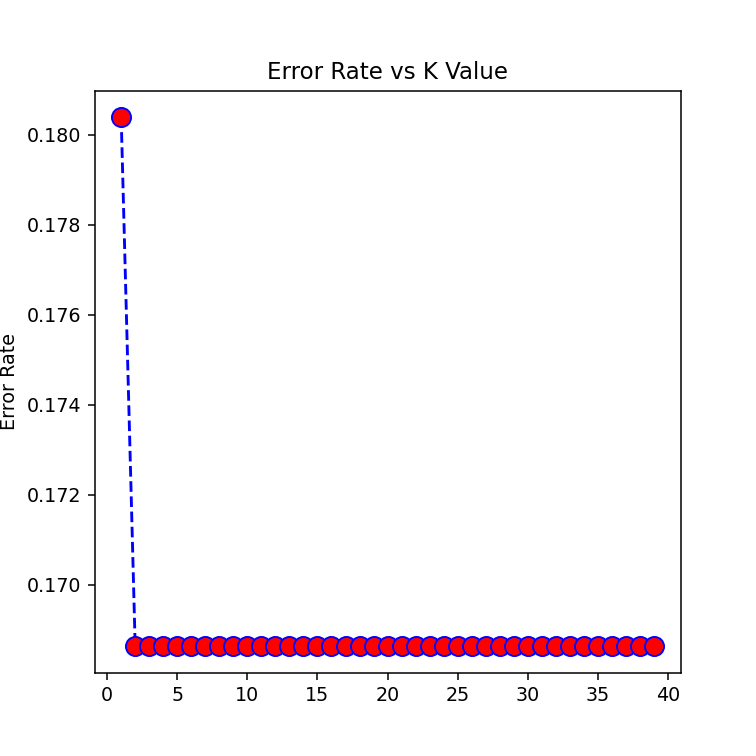

Text(0, 0.5, 'Error Rate')

In [30]:
error_rate=list()
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
plt.figure(figsize=(4,4))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

<IPython.core.display.Javascript object>


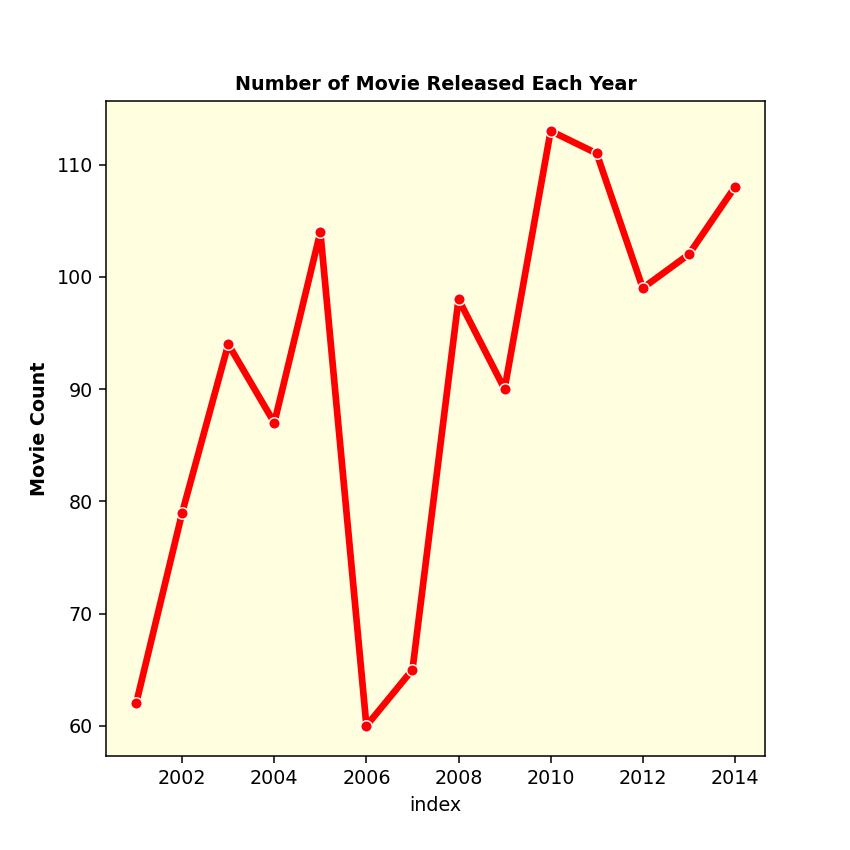

In [33]:
movie_each_year = df['releaseYear'].value_counts().reset_index()
plt.figure(figsize = (4.5,4.5))
ax = plt.axes()
ax.set(facecolor = 'lightyellow')
ax.grid(False)
sns.lineplot(data = movie_each_year,x = 'index',y = 'releaseYear',marker = 'o',color = 'red', linewidth =3.5, palette = 'CMRmap')
plt.xlabel='Year'
plt.ylabel('Movie Count',fontsize = 10
        ,fontweight = 'bold')
plt.title('Number of Movie Released Each Year',fontsize = 10,fontweight = 'bold')
plt.show()

<IPython.core.display.Javascript object>


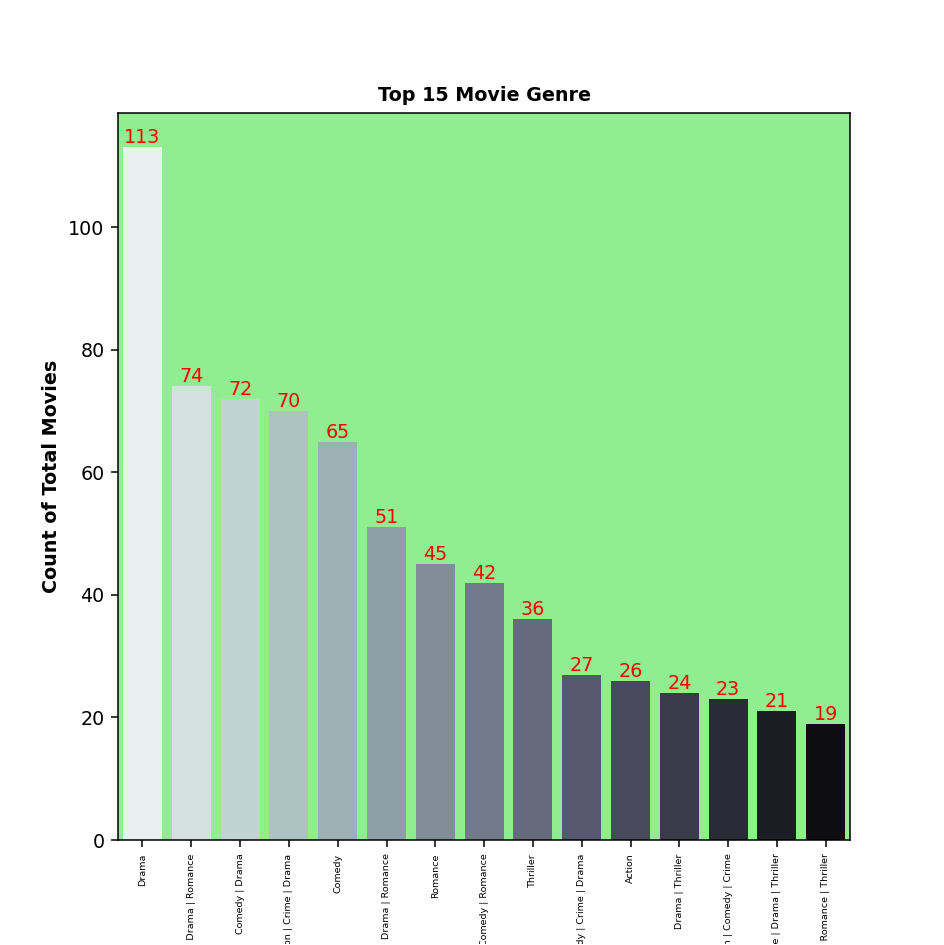

In [45]:
plt.figure(figsize = (5,5))
ax = plt.axes()
ax.set(facecolor = 'lightgreen')
ax.grid(False)
sns.countplot(data = df,x = 'genre',order = df['genre'].value_counts().index[0:15],palette = 'bone_r')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')

plt.xticks(rotation = 90, fontsize = 5)
plt.xlabel='Genre'
plt.ylabel('Count of Total Movies', fontsize = 10,fontweight = 'bold')
plt.title('Top 15 Movie Genre', fontsize = 10,fontweight = 'bold')

plt.show()